In [115]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

In [116]:
df=pd.read_csv('Base_de_Dados.csv')
df

,Unnamed: 0,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente
0,NaN,10001,1-01-20,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,"""R$""1800",21,"""R$""37800",amazon,Rio de Janeiro,RJ
1,NaN,10002,1-01-20,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,"""R$""1800",57,"""R$""102600",Shoptime,Betim,MINAS
2,NaN,10003,1-02-20,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,"""R$""4300",59,"""R$""253700",Carrefour,Rio de Janeiro,RJ
3,NaN,10004,1-02-20,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,"""R$""4300",89,"""R$""382700",Carrefour,Rio de Janeiro,RJ
4,NaN,10005,1-02-20,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,"""R$""88",71,"""R$""6248",Ricardo Eletro,Vitória,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,NaN,200807,12-28-20,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,"""R$""1998",11,"""R$""21978",amazon,Salvador,BA
3207,NaN,200808,12-28-20,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,"""R$""80",20,"""R$""1600",Ponto Frio,Salvador,BA
3208,NaN,200809,12-29-20,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,"""R$""1800",71,"""R$""127800",kabum,Fortaleza,CE
3209,NaN,200810,12-30-20,1001,Maria Silva,Nordeste,SKU9006,E-Reader,"""R$""250",51,"""R$""12750",Casas Bahia,João Pessoa,PB


In [117]:
df.isnull().sum()

Unnamed: 0            3211
ID_Pedido                0
Data_Pedido              0
ID_Representante         0
Nome_Representante       0
Regional                 0
ID_Produto               0
Nome_Produto             0
Valor_Produto            0
Quantidade_Vendida       0
Valor_Total_Venda        0
Nome_Cliente             0
Cidade_Cliente           0
Estado_Cliente           0
dtype: int64

In [118]:
df.isnull().sum()

Unnamed: 0            3211
ID_Pedido                0
Data_Pedido              0
ID_Representante         0
Nome_Representante       0
Regional                 0
ID_Produto               0
Nome_Produto             0
Valor_Produto            0
Quantidade_Vendida       0
Valor_Total_Venda        0
Nome_Cliente             0
Cidade_Cliente           0
Estado_Cliente           0
dtype: int64

In [119]:
df.describe()

,Unnamed: 0,ID_Pedido,ID_Representante,Quantidade_Vendida
count,0.0,3211.000000,3211.000000,3211.000000
mean,NaN,58987.999377,1004.882280,49.567736
std,NaN,82222.202857,2.782987,26.945682
min,NaN,10001.000000,1001.000000,5.000000
25%,NaN,10803.500000,1002.000000,26.000000
50%,NaN,11606.000000,1005.000000,49.000000
75%,NaN,200008.500000,1007.000000,72.000000
max,NaN,200811.000000,1009.000000,100.000000


In [120]:
df.shape

(3211, 14)

In [121]:
df.columns

Index(['Unnamed: 0', 'ID_Pedido', 'Data_Pedido', 'ID_Representante',
       'Nome_Representante', 'Regional', 'ID_Produto', 'Nome_Produto',
       'Valor_Produto', 'Quantidade_Vendida', 'Valor_Total_Venda',
       'Nome_Cliente', 'Cidade_Cliente', 'Estado_Cliente'],
      dtype='object')

In [122]:
# Remover o símbolo "R$" e as aspas duplas e converter 'Valor_Total_Venda' para float
df['Valor_Total_Venda'] = df['Valor_Total_Venda'].str.replace('R\\$', '', regex=True).str.replace('"', '').astype(float)

# Converter 'Data_Pedido' para datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%m-%d-%y')

In [123]:
df

,Unnamed: 0,ID_Pedido,Data_Pedido,ID_Representante,Nome_Representante,Regional,ID_Produto,Nome_Produto,Valor_Produto,Quantidade_Vendida,Valor_Total_Venda,Nome_Cliente,Cidade_Cliente,Estado_Cliente
0,NaN,10001,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,"""R$""1800",21,37800.0,amazon,Rio de Janeiro,RJ
1,NaN,10002,2020-01-01,1004,Isabela Carolina,Sudeste,SKU9005,Celular Modelo 3,"""R$""1800",57,102600.0,Shoptime,Betim,MINAS
2,NaN,10003,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,"""R$""4300",59,253700.0,Carrefour,Rio de Janeiro,RJ
3,NaN,10004,2020-01-02,1002,Lucas Souza,Sudeste,SKU9011,Notebook Modelo 3,"""R$""4300",89,382700.0,Carrefour,Rio de Janeiro,RJ
4,NaN,10005,2020-01-02,1005,Tais Fernandes,Sudeste,SKU9008,Mouse,"""R$""88",71,6248.0,Ricardo Eletro,Vitória,ES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3206,NaN,200807,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9012,Smart TV,"""R$""1998",11,21978.0,amazon,Salvador,BA
3207,NaN,200808,2020-12-28,1008,Teobaldo Junior,Nordeste,SKU9015,Teclado,"""R$""80",20,1600.0,Ponto Frio,Salvador,BA
3208,NaN,200809,2020-12-29,1006,Mário Junior,Nordeste,SKU9005,Celular Modelo 3,"""R$""1800",71,127800.0,kabum,Fortaleza,CE
3209,NaN,200810,2020-12-30,1001,Maria Silva,Nordeste,SKU9006,E-Reader,"""R$""250",51,12750.0,Casas Bahia,João Pessoa,PB


In [125]:
print(df.columns)

Index(['Unnamed: 0', 'ID_Pedido', 'Data_Pedido', 'ID_Representante',
       'Nome_Representante', 'Regional', 'ID_Produto', 'Nome_Produto',
       'Valor_Produto', 'Quantidade_Vendida', 'Valor_Total_Venda',
       'Nome_Cliente', 'Cidade_Cliente', 'Estado_Cliente'],
      dtype='object')


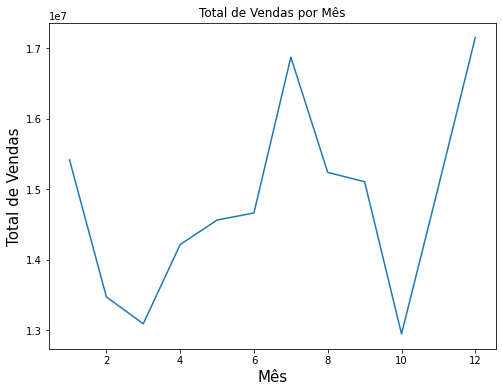

In [127]:
# Converter 'Data_Pedido' para datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], format='%m-%d-%y')

# Agora você pode tentar plotar o gráfico novamente
df.groupby(df['Data_Pedido'].dt.month)['Valor_Total_Venda'].sum().plot(kind='line', figsize=(8,6))
plt.xlabel('Mês',fontsize=15)
plt.ylabel('Total de Vendas',fontsize=15)
plt.title('Total de Vendas por Mês')
plt.show()


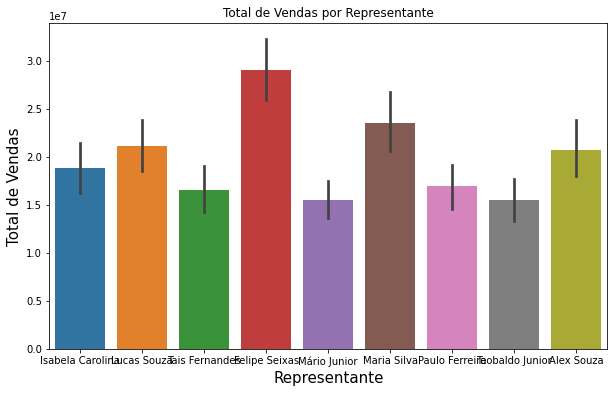

In [128]:
# Total de Vendas por Representante
plt.figure(figsize=(10,6))
sns.barplot(x='Nome_Representante', y='Valor_Total_Venda', data=df, estimator=sum)
plt.xlabel('Representante',fontsize=15)
plt.ylabel('Total de Vendas',fontsize=15)
plt.title('Total de Vendas por Representante')
plt.show()

In [129]:
# Total de Vendas por Produto
total_vendas_produto = df.groupby('Nome_Produto')['Valor_Total_Venda'].sum()
print(total_vendas_produto)

Nome_Produto
Caixa de Som             355465.0
Carregador Portátil     1055920.0
Celular Modelo 1       11129600.0
Celular Modelo 2       13245600.0
Celular Modelo 3       21058200.0
E-Reader                2554500.0
Headphone               1413600.0
Mouse                    826672.0
Notebook Modelo 1      17326050.0
Notebook Modelo 2      22339860.0
Notebook Modelo 3      50082100.0
SSD                     2539095.0
Smart TV               14581404.0
Tablet                 17554200.0
Teclado                  732480.0
Webcam                   980070.0
Name: Valor_Total_Venda, dtype: float64


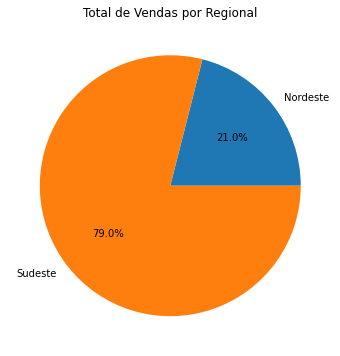

In [130]:
# Total de Vendas por Regional
df.groupby('Regional')['Valor_Total_Venda'].sum().plot(kind='pie', figsize=(8,6), autopct='%1.1f%%')
plt.ylabel('')
plt.title('Total de Vendas por Regional')
plt.show()

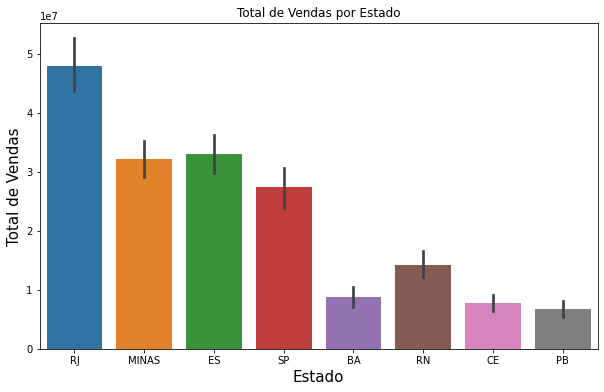

In [131]:
# Total de Vendas por Estado
plt.figure(figsize=(10,6))
sns.barplot(x='Estado_Cliente', y='Valor_Total_Venda', data=df, estimator=sum)
plt.xlabel('Estado',fontsize=15)
plt.ylabel('Total de Vendas',fontsize=15)
plt.title('Total de Vendas por Estado')
plt.show()

In [132]:
#passo 2

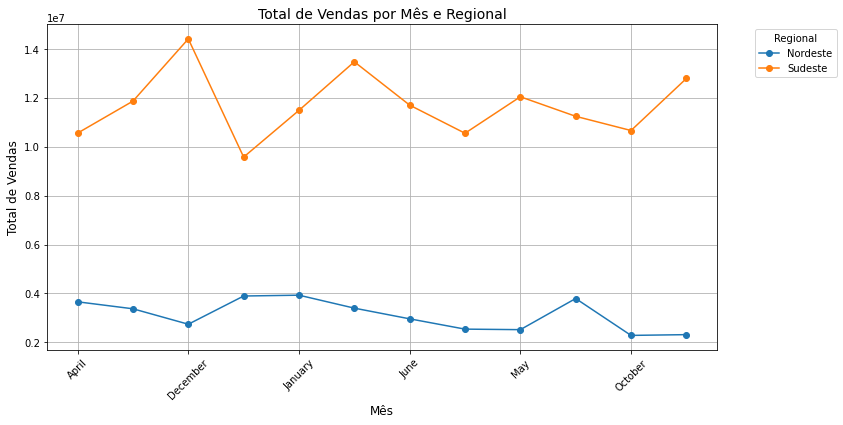

In [138]:
# Criar uma tabela dinâmica para calcular o total de vendas por mês e por regional
pivot_table = df.pivot_table(index='Regional', columns=df['Data_Pedido'].dt.strftime('%B'), values='Valor_Total_Venda', aggfunc='sum')

# Plotar o gráfico de linhas
pivot_table.T.plot(kind='line', marker='o', figsize=(12, 6))
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.title('Total de Vendas por Mês e Regional', fontsize=14)
plt.legend(title='Regional', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


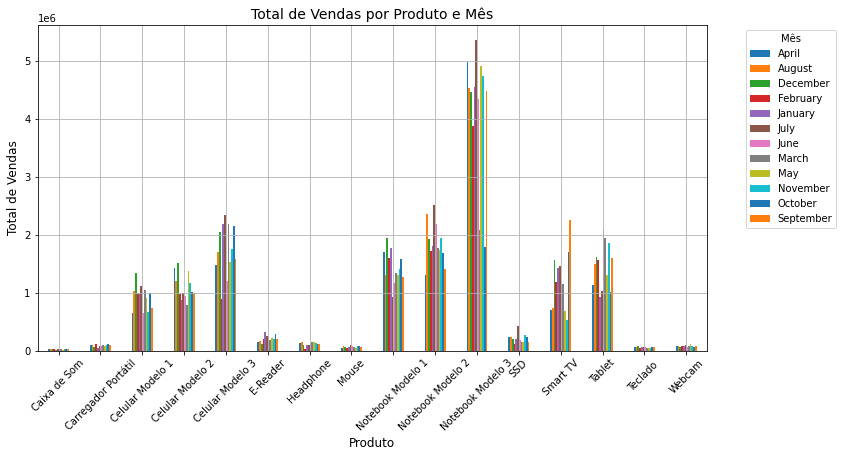

In [139]:
# Criar uma tabela dinâmica para calcular o total de vendas por mês e por produto
pivot_table = df.pivot_table(index='Nome_Produto', columns=df['Data_Pedido'].dt.strftime('%B'), values='Valor_Total_Venda', aggfunc='sum')

# Plotar o gráfico de barras agrupado
pivot_table.plot(kind='bar', figsize=(12, 6))
plt.xlabel('Produto', fontsize=12)
plt.ylabel('Total de Vendas', fontsize=12)
plt.title('Total de Vendas por Produto e Mês', fontsize=14)
plt.legend(title='Mês', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [141]:
import dash
from dash import dcc, html, Input, Output
import pandas as pd
import plotly.express as px

# Supondo que você já tenha o DataFrame df com os dados
# Obter a lista única de produtos
produtos = df['Nome_Produto'].unique()

# Inicializar o aplicativo Dash
app = dash.Dash(__name__)

# Layout do aplicativo
app.layout = html.Div([
    html.H1("Total de Vendas por Produto e Mês"),
    html.Label("Selecione o produto:"),
    dcc.Dropdown(
        id='dropdown-produto',
        options=[{'label': produto, 'value': produto} for produto in produtos],
        value=produtos[0]  # Valor padrão selecionado
    ),
    dcc.Graph(id='graph-vendas')
])

# Callback para atualizar o gráfico com base no produto selecionado
@app.callback(
    Output('graph-vendas', 'figure'),
    [Input('dropdown-produto', 'value')]
)
def update_graph(produto):
    # Filtrar o DataFrame para o produto selecionado
    df_produto = df[df['Nome_Produto'] == produto]
    
    # Criar uma tabela dinâmica para calcular o total de vendas por mês
    pivot_table = df_produto.pivot_table(index=df_produto['Data_Pedido'].dt.strftime('%B'), values='Valor_Total_Venda', aggfunc='sum').reset_index()
    
    # Plotar o gráfico de barras usando Plotly Express
    fig = px.bar(pivot_table, x='Data_Pedido', y='Valor_Total_Venda', title=f'Total de Vendas de {produto} por Mês', labels={'Valor_Total_Venda': 'Total de Vendas', 'Data_Pedido': 'Mês'})
    return fig

# Executar o aplicativo Dash
if __name__ == '__main__':
    app.run_server(debug=True)


In [136]:
# Crie um dropdown para os estados
estado_dropdown = widgets.Dropdown(
    options=df['Estado_Cliente'].unique(),
    description='Estado:'
)

# Crie um segundo dropdown para as cidades
cidade_dropdown = widgets.Dropdown(
    description='Cidade:'
)

# Função para atualizar as opções do segundo dropdown com base no estado selecionado
def update_cidades(*args):
    estado_selecionado = estado_dropdown.value
    cidades = df[df['Estado_Cliente'] == estado_selecionado]['Cidade_Cliente'].unique()
    cidade_dropdown.options = cidades

# Atualize as opções do segundo dropdown sempre que o valor do primeiro dropdown mudar
estado_dropdown.observe(update_cidades, 'value')

# Exiba os dropdowns
display(estado_dropdown, cidade_dropdown)


Dropdown(description='Estado:', options=('RJ', 'MINAS', 'ES', 'SP', 'BA', 'RN', 'CE', 'PB'), value='RJ')

Dropdown(description='Cidade:', options=(), value=None)